# Introduction aux méthodes numériques
## METHODE DES ELEMENTS FINIS
## Résolution de l'équation de la chaleur en 1D

On considère de nouveau le problème  de la chaleur en statique

<img src = "condensateur1D.png" title = "Condensateur Plan" alt = "condo">



$\frac{k\delta^2 T}{\delta x^2} = 0, \ 0<x<L \\  $ <br />
$T(0)=T_{cold}; T(L)=T_{hot} $

+ T est la température
+ L la longueur entre les deux plaques
+ k La conductivité thermique du matériau

Trouver T(x) solution du  problème aux limites:

La résolution de ce problème par la méthode des éléments finis nécessite son écriture sous forme variationnelle ou forme faible. On montre que résoudre le problème ci-dessus équivaut à résoudre le problème ci-dessous :

$\int_{\Omega}{\frac{\delta}{\delta x}(\frac{k\delta T(x)}{\delta x})\Phi(x) \ d\Omega} = 0, \ 0<x<L \\  $ <br />
$T(0)=T_{cold}; T(L)=T_{hot} $



On cherche une fonction T de carré sommable ($\int_{\Omega}{T(x)^2d\Omega}$ l’intégrale existe, fonction à énergie finie) et la dérivée de T est également de carré sommable.

La fonction $\Phi $ est appelée fonction test, elle vérifie les mêmes propriétés que la solution  T aux limites du domaine d’étude.

En intégrant par partie le problème devient
$\int_{\Omega}(\frac{k\delta T(x)}{\delta x}){\frac{\delta \Phi(x)}{\delta x} \ d\Omega}-[\Phi(x)\frac{\delta \Phi}{\delta x}]^L_0 = 0, \ 0<x<L \\  $ <br />

L'intégration sur l'ensemble du domaine s'écrit $\int_{\Omega}(\frac{k\delta T(x)}{\delta x}){\frac{\delta \Phi(x)}{\delta x} \ d\Omega} = \sum_{k=1}^{N}{\int_{e_k}{(\frac{k\delta T(x)}{\delta x}){\frac{\delta \Phi(x)}{\delta x} \ dK}}}$

On recherche une solution numérique approchée Th(x). En éléments finis, cette solution approchée est construite à partir de 2 données :

1. un maillage Mh du domaine de calcul W,
2. un choix d’interpolation Pk sur ce maillage

Pour notre domaine de calcul unidimensionnel $\Omega = [0, L]$, le maillage correspond à un découpage de $\Omega$ en N segments $e_k=[x_i,x_{i+1}]$. Ces segments sont appelés les éléments finis. Les extrémités de chacun de ces segments sont appelés les noeuds du maillage. C’est en ces noeuds que vont être évaluées les températures. On  recherche la température T_i en chaque noeud de ce maillage. 
La matrice A est construite en évaluant les termes intégrales sur chaque élément fini. Le second membre est obtenu à partir du terme source et des conditions aux limites.

Sur chaque segment (élément fini), on choisit une interpolation polynômiale. Cette interpolation permet de calculer la température T(x) en tout point de coordonnée x appartenant à chaque élément à partir des valeurs de la température aux nœuds de l’élément. Le type de l’interpolation dépend du problème à traiter. Pour notre problème elle doit en particulier respecter les points suivants :
1. les intégrales dans la formulation faible  ou variationnelle  doivent exister, sans que le problème dégénère,
2. on cherche d’autre part une solution approchée globalement continue.

La première condition impose que sur chaque élément le polynôme d’interpolation x) soit au moins de degré 1 pour pouvoir calculer les dérivées premières de la solution qui interviennent dans la formulation faible. Sur chaque élément $e_k = [x_k,x_{k+1}]$, la solution approchée est donc un polynôme P(x) de degré l ≥ 1.
Pour un polynôme d’ordre 1 sur [xk,xk+1] (éléments finis P1), on utilise 2 points d’interpolation : les 2 extrémités du segment {S1 = xk, S2 = xk+1} .

<img src = "interpfem1d.png" title = "Interpolation lineaire (ordre 1)" alt = "interp">

T_i est la valeur de la solution approchée aux sommets des éléments finis



### Mise en oeuvre de la méthode des éléments finis

En utilisant cette interpolation sur chaque élément, le problème se formule alors
Trouver T_1, T_2,.....T_N solution de


1. Calcul des contributions élémentaires (sur un élément) (matrice locale 2*2) : En utilisant l’interpolation ci-dessus, évaluer les contributions élémentaires $M_{11} , M_{12} , M_{21} , M_{22}$ associées à l’élément fini $ e_k =[x_{i-1} ,x_{i}] $ correspondant au calcul du terme intégrale :

<p style="text-align: center;">  $M_{i,j}=\int_{[x_{i-1,x_i}]}(\frac{k\delta \Phi_i(x)}{\delta x}){\frac{\delta \Phi_j(x)}{\delta x} \ dx}$ </p>

2. Assemblage : Il faut maintenant cumuler ces contributions (matrice locale) dans la matrice globale dimensionnée sur le nombre de nœuds inconnu du problème.


---> Definition des grandeurs du probleme
---> Generation du maillage 
---> Boucle sur les elements finis
---> Prise en compte des conditions aux limites
---> Resolution du systeme lineaire
---> Visualisation


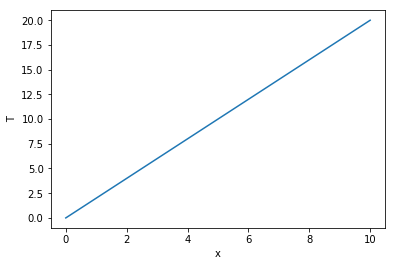

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Feb 13 02:07:20 2019

@author: laurent
"""

import math
import numpy as np
import matplotlib.pyplot as plt

#================================================================#
#
#
# Resolution equation de la chaleur 1D  par la methode des elements finies  
#						      #
# Resolution du probleme stationnaire :                #
#                                                     #
#    C.dT/dt - k.d2T/dx2 = 0     sur   0 < x < L      #

# 
# Temperature imposee sur l'extremite droite en x = 0 Tcold
#
#  modification le 13/02/2019 Mise en place condition de Dirichlet
# 
#
#
#===================================================================#

print('---> Definition des grandeurs du probleme')
# Definition des constantes physiques
k = 1. #  Conductivite thermique
L = 10. #  longueur du fil(m)

# Conditions aux limites
Thot = 20;		#  Temperature bout du cable dans l'enceinte
Tair = 23.5;		#  Temperature bout du cable à l'exterieur
Tcold= 0.;  

# Parametres numeriques du calcul
NbElts = 19;		#  Nombre d'elt en espace (segment)
NbNoeuds = NbElts+1;	#  Nombre de noeud



  
# discretisation spaciale
print('---> Generation du maillage ')
x=np.linspace(0.,L,NbNoeuds)

# Construction de A (matrice de raideur) et de F (terme source)

MatMef = np.zeros((NbNoeuds,NbNoeuds),np.double)    # Matrice de rigidite
SdMembre = np.zeros((NbNoeuds,1),np.double)
MatRigElmt=np.zeros((2,2),np.double)
NumElmt=np.zeros((2,1),int)

Grad= np.array([-1., 1.])

print('---> Boucle sur les elements finis')
   
for ie in range(NbElts):

    NumElmt= np.array([ie, ie+1])
   
    h = x[NumElmt[1]]-x[NumElmt[0]]
   
      
    # Calcul des contribution sur un élément fini
    MatRigElmt[0,0] = k/h
    MatRigElmt[0,1] = -k/h
    MatRigElmt[1,0] = -k/h
    MatRigElmt[1,1] = k/h
    
    #MatRigElmt = (k/pas)* np.dot(Grad.transpose,Grad)
    MatMef[NumElmt[0],NumElmt[0]] +=  MatRigElmt[0,0]
    MatMef[NumElmt[0],NumElmt[1]] +=  MatRigElmt[0,1]
    MatMef[NumElmt[1],NumElmt[0]] +=  MatRigElmt[1,0]
    MatMef[NumElmt[1],NumElmt[1]] +=  MatRigElmt[1,1]        
    
    



# Calcul numerique du Regime Permanent (R.P.)

print('---> Resolution du systeme lineaire')    
T = np.linalg.solve(MatMef, SdMembre) # inversion du systeme matriciel
   

#  Visualisation de la solution de la solution 


print('---> Visualisation')
plt.plot(x,T)
plt.ylabel('T')
plt.xlabel('x')
plt.show()
        
        


3. Prise en compte des conditions aux limites : En réduisant les dimensions de la matrice globale des nœuds ou la température est imposée et en reportant les termes connus au second membre, reformuler le système en explicitant le second membre.


In [ ]:
big=1.e6
# Prise en compte des conditions aux limites
#On supprime la premiere et derniere inconnues qui sont definies pas les conditions aux bords

# Condition de Dirichlet sur la paroi exterieure
print('---> Prise en compte des conditions aux limites')
SdMembre[NbNoeuds-1]= big*Thot
MatMef[NbNoeuds-1,NbNoeuds-1]+=big

# Condition de Dirichlet en x=0

SdMembre[0] = big*Tcold
MatMef[0,0]+=big

4. Vérifier que l’on retrouve bien le même système linéaire que celui obtenu avec la méthode des différences finies.
5. Quelles seraient les modifications à apporter au programme si entre les parois on avait plusieurs matériaux thermiques différents.